# HYPERPARAMETERS DATABASE (2)

Dataset : New York City Taxi Trip Duration

Type : Regression

# Abstract

- The aim of this project is to create a database for the best hyperparameters by performing hyperparameter tuning using H2O AutoML on various datasets

- This will eventually be used towards creating a website that will suggest the best hyperparameters when inputted with that particular dataset thus making the work easier to create the best models

- The objective is to make the modeling task easier for people by suggesting hyperparameters that can give good results

- We have trained the regression dataset on H2OAutoML for 3 different runtimes i.e. 800, 1500, and 2000 secs and observed the leaderboards for the same

- We scraped the models from the leaderboards along with the parameters they generated and then extracted the best hyperparameters for these models and stored them in a json and csv file

- Then further calculated the variable importance and range of the hyperparameters and also, the best hyperparameters from the scraped out hyperparameters

- Also, simultaneously have maintained a meta_data file

##  DESCRIPTION

Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.
To improve the efficiency of taxi systems it is important to be able to predict how long a driver will have his taxi occupied.

With 11 self explanatory data fields, and a large amount of containing approx 1458644 trip records in train and 625134 trip records in test, allows us to analyse which models will work best on this dataset.

## DATA

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor  -- because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\Aesha\PycharmProjects\INFO6105\NewEnv\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Aesha\AppData\Local\Temp\tmpn5yr85g0
  JVM stdout: C:\Users\Aesha\AppData\Local\Temp\tmpn5yr85g0\h2o_Aesha_started_from_python.out
  JVM stderr: C:\Users\Aesha\AppData\Local\Temp\tmpn5yr85g0\h2o_Aesha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Aesha_dthlqi
H2O cluster total nodes:,1
H2O cluster free memory:,2.646 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [2]:
df_train = pd.read_csv('train_nyc.csv')
df_test = pd.read_csv('test_nyc.csv')

In [3]:
df_train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
print("Total number of samples in test dataset: ", df_train.shape[0])
print("Number of columns in test dataset: ", df_train.shape[1])

Total number of samples in test dataset:  1458644
Number of columns in test dataset:  11


In [6]:
print("Total number of samples in test dataset: ", df_test.shape[0])
print("Number of columns in test dataset: ", df_test.shape[1])

Total number of samples in test dataset:  625134
Number of columns in test dataset:  9


The training dataset contains 11 columns and the test dataset contains 9 columns. The two additional columns that are present in the training dataset, and not in the test dataset are dropoff_datetime and trip_duration. By looking at the sample_submission.csv file, we understand that we need to predict the trip_duration.

## Checking for NaNs

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

trip_duration         0
store_and_fwd_flag    0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
passenger_count       0
dropoff_datetime      0
pickup_datetime       0
vendor_id             0
id                    0
dtype: int64

In [8]:
df_test.isnull().sum().sort_values(ascending=False)

store_and_fwd_flag    0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
passenger_count       0
pickup_datetime       0
vendor_id             0
id                    0
dtype: int64

Checking if all the ids present in the training and testing dataset are unique

In [9]:
print("Number of ids in the train dataset: ", len(df_train["id"]))
print("Number of unique ids in the train dataset: ", len(pd.unique(df_train["id"])), "\n")

print("Number of ids in the test dataset: ", len(df_test["id"]))
print("Number of unique ids in the test dataset: ", len(pd.unique(df_test["id"])), "\n")

print("Number of common ids(if any) between the train and test datasets: ", \
len(set(df_train["id"].values).intersection(set(df_test["id"].values))))

Number of ids in the train dataset:  1458644
Number of unique ids in the train dataset:  1458644 

Number of ids in the test dataset:  625134
Number of unique ids in the test dataset:  625134 

Number of common ids(if any) between the train and test datasets:  0


* vendor_id takes on only two values in both the train and test datasets i.e. 1 and 2 (Hypothesis - This could represent data from two different taxi companies)

* This leads to a set of follow-up questions:

* If the hypothesis is right and the values in the vendor_id column actually represent the data from two different taxi companies; are the number of observations in the dataset from each of the companies comparable or is there any imbalance?(Both in the train and test datasets)

* Among the vendor_id's(1 and 2) - what is the distribution in the number of passengers (passenger_count) across the train and test datasets?

In [10]:
print("Number of vendor_ids in the train dataset: ", len(df_train["vendor_id"]))
print("Number of unique vendor_ids in the train dataset: ", len(pd.unique(df_train["vendor_id"])), "\n")

print("Number of vendor_ids in the test dataset: ", len(df_test["vendor_id"]))
print("Number of unique vendor_ids in the test dataset: ", len(pd.unique(df_test["vendor_id"])), "\n")

Number of vendor_ids in the train dataset:  1458644
Number of unique vendor_ids in the train dataset:  2 

Number of vendor_ids in the test dataset:  625134
Number of unique vendor_ids in the test dataset:  2 



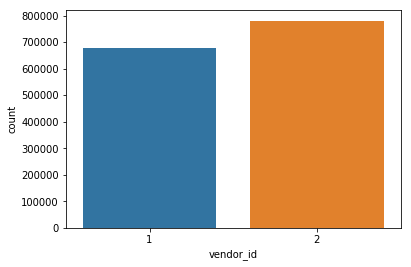

In [11]:
##The number of observations in the dataset from each of the two companies i.e. 1 and 2, seems to be comparable across the train and test datasets
sns.countplot(x="vendor_id", data=df_train)

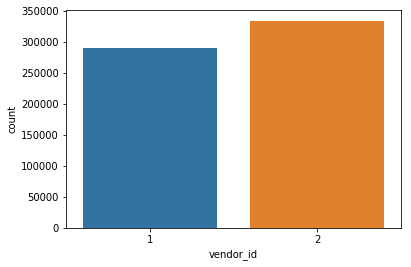

In [12]:
sns.countplot(x="vendor_id", data=df_test)

### String to Datetime conversion

In [13]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])

df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])

trip_duration is the difference in the dropoff_datetime and pickup_datetime

In [14]:
df_train["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [15]:
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
dtype: object

There happens to be a trip that lasted for 40 days which is vague and can definitely be marked as outlier and should be dropped

### Checking for outliers 

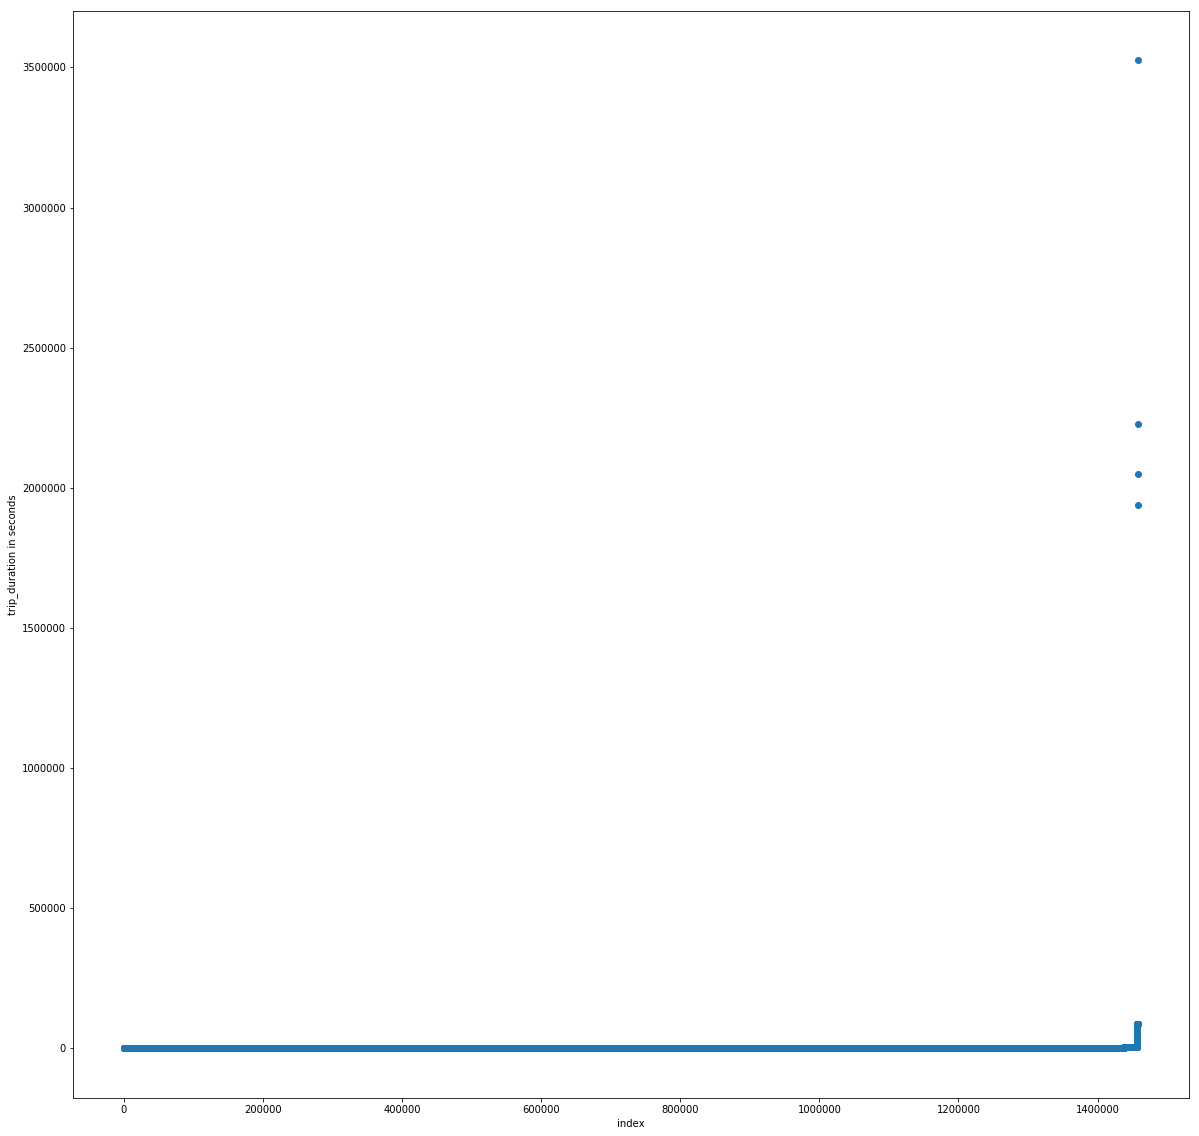

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

We can see that their are 4 outliers with a duration of 20 days or more

## Removing these outliers

In [17]:
df_train = df_train[df_train["trip_duration"] < 500000]

In [18]:
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

According to the Data Dictionary the store and fwd flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip. This must therefore indicate that most of the trips(99.448% to be precise) were not stored in the vehicle memory before forwarding.

In [19]:
len(df_train[df_train["store_and_fwd_flag"] == "N"])*100.0/(df_train.count()[0])

99.44845883836999

In [20]:
set(df_train[df_train["store_and_fwd_flag"] == "Y"]["vendor_id"])

{1}

In [21]:
df_test.shape

(625134, 9)

Among the 0.551% of the trips in the train dataset, where the trip record was stored in the vehicle memory; we observe that all the 0.551% of the cases were only for vendor id = 1.

### Calculating the distances between pickup and dropoff latitude and longitude co-ordinates

In [22]:
from haversine import haversine

In [23]:
def calculate_haversine_distance(var_row):
    return haversine((var_row["pickup_latitude"], var_row["pickup_longitude"]), 
                     (var_row["dropoff_latitude"], var_row["dropoff_longitude"]), unit = 'mi')

* Calculating the Haversine Distance
* The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

In [24]:
df_train["haversine_distance"] = df_train.apply(lambda row: calculate_haversine_distance(row), axis=1)

In [25]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.931139
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.121892
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.967522
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.923047
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.738556


In [26]:
df_train["haversine_distance"].describe()

count    1.458640e+06
mean     2.138042e+00
std      2.669725e+00
min      0.000000e+00
25%      7.654273e-01
50%      1.300974e+00
75%      2.408017e+00
max      7.710660e+02
Name: haversine_distance, dtype: float64

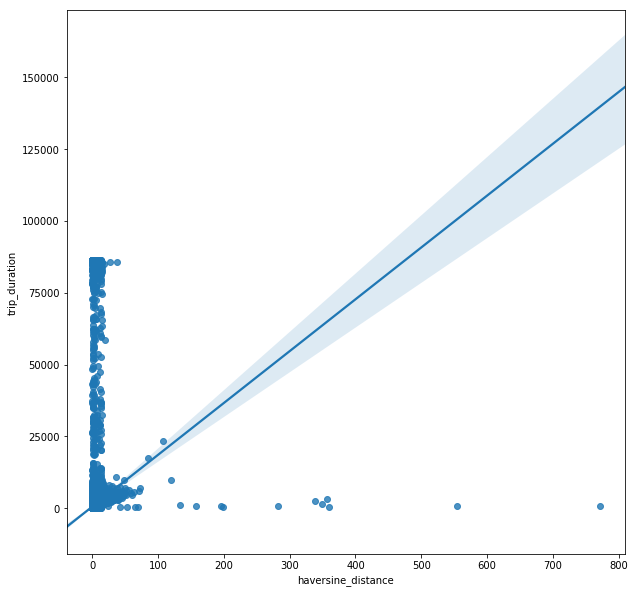

In [27]:
plt.figure(figsize=(10,10))
sns.regplot(x="haversine_distance", y="trip_duration", data=df_train)

In [28]:
df_train[df_train["haversine_distance"] > 100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance
114376,id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,23440,107.515607
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,771.065969
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,875,195.585678
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,198.917209
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,339.178108
644165,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,804,158.054383
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,359.676748
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,349.357232
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,553.775535
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,933,282.874161


In [29]:
combined_data = pd.concat([df_train, df_test], keys=['df_train', 'df_test'], sort=False)
combined_data.shape

(2083774, 12)

In [30]:
combined_data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
df_train 0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
         1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
         2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
         3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
         4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

            passenger_count  pickup_longitude  pickup_latitude  \
df_train 0                1        -73.982155        40.767937   
         1                1        -73.980415        40.738564   
         2                1        -73.979027        40.763939   
         3                1        -74.010040        40.719971   
         4                1        -73.973053        40.793209   

            dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
df_train 0         -73.964630         40.765602                  N   
         1         -73.999481         40.731152                  N   
         2         -74.005333         40.710087                  N   
         3         -74.012268         40.706718                  N   
         4         -73.972923         40.782520                  N   

            trip_duration  haversine_distance  
df_train 0          455.0            0.931139  
         1          663.0            1.121892  
         2         2124.0            3.967522  
         3          429.0            0.923047  
         4          435.0            0.738556

In [31]:
combined_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,haversine_distance
count,2.083774e+06,2.083774e+06,2.083774e+06,2.083774e+06,2.083774e+06,2.083774e+06,1.458640e+06,1.458640e+06
mean,1.534931e+00,1.663701e+00,-7.397352e+01,4.075092e+01,-7.397343e+01,4.075180e+01,9.528153e+02,2.138042e+00
std,4.987784e-01,1.313359e+00,7.165689e-02,3.200124e-02,7.122526e-02,3.587059e-02,3.171322e+03,2.669725e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073736e+01,-7.399133e+01,4.073592e+01,3.970000e+02,7.654273e-01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397976e+01,4.075453e+01,6.620000e+02,1.300974e+00
75%,2.000000e+00,2.000000e+00,-7.396735e+01,4.076837e+01,-7.396301e+01,4.076982e+01,1.075000e+03,2.408017e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.885760e+01,8.639200e+04,7.710660e+02


In [32]:
combined_data.drop('id', axis = 1, inplace=True)

In [33]:

combined_data.shape

(2083774, 11)

In [34]:
missing = combined_data.isnull().sum()/len(combined_data)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

haversine_distance    0.300001
trip_duration         0.300001
dropoff_datetime      0.300001
dtype: float64

In [35]:
combined_data2 = pd.get_dummies(combined_data, drop_first=True)

In [36]:
combined_data2.shape

(2083774, 11)

In [37]:
train = combined_data2.loc['df_train']

In [38]:
test = combined_data2.loc['df_test']

In [40]:
train.columns.values

array(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'haversine_distance', 'store_and_fwd_flag_Y'], dtype=object)

In [42]:
test.columns.values

array(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'haversine_distance', 'store_and_fwd_flag_Y'], dtype=object)

In [43]:
print(train.shape)
print(test.shape)

(1458640, 11)
(625134, 11)


In [44]:
header_train = ['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'haversine_distance', 'store_and_fwd_flag_Y']

In [45]:
header_test = ['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'haversine_distance', 'store_and_fwd_flag_Y']

### CONVERTING THE TRAINING AND TESTING DATA INTO CSV FILES AFTER CONVERTING THEM INTO DATAFRAMES¶

In [46]:
training = pd.DataFrame(train)
testing = pd.DataFrame(test)
training.to_csv('training data.csv', columns = header_train, index=False)
testing.to_csv('testing data.csv', columns = header_test, index=False)

In [47]:
training = h2o.import_file("training data.csv")
testing = h2o.import_file("testing data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [48]:
def alphabet(n):  ## for generating some arbitrary run id
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

# storing in meta_data dictionary  
def set_meta_data(analysis,run_id,server,data,model_path,run_time,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  # m_data['target']=target
  #m_data['classification']=classification
  m_data['project'] =name
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['start_time_sec'] = time.time()
  #m_data['min_mem_size'] = min_mem_size
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold 
  m_data['max_models']=model
  m_data['scale']=scale  
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['analysis'] = analysis
  m_data['end_time_sec'] = time.time()  
  return m_data

#### ASSIGNING DATA PARAMETERS, STOPPING PARAMETERS, SOME OPTIONAL PARAMETERS, AND MISCELLANEOUS OPTIONAL PARAMATERS FOR PERFORMING H2O ON THE MODEL

In [49]:
target='vendor_id' 
data_file='training'
run_id=alphabet(9) # Just some arbitrary ID
server_path=None
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_DB2"  # project_name = project
analysis=0
data_path=None
model_path=None
run_time = 800
name=None 
nthreads=1                       
analysis=0
min_mem_size=6
run_dir =None

#### SIMULTANEOUSLY CREATING METADATA

In [50]:
#meta data
meta_data =set_meta_data(analysis, run_id,server_path,data_path,model_path,run_time,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'project': None, 'run_time': 800, 'run_id': 'Kj2dExOOv', 'start_time_sec': 1556286091.311026, 'balance': False, 'balance_threshold': 0.2, 'max_models': None, 'scale': False, 'model_path': None, 'server_path': None, 'data_path': None, 'run_path': None, 'nthreads': 1, 'analysis': 0, 'end_time_sec': 1556286091.311026}


In [51]:
y = target
X = [name for name in training.columns if name != y]
print(y)
print(X)

vendor_id
['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'haversine_distance', 'store_and_fwd_flag_Y']


#### PUTTING ALL THE INDEPENDET VARIABLES IN THE META DATA

In [52]:

model_start_time = time.time()

In [53]:
meta_data['variables']=X

In [54]:
import os

#### RUNNING H2O AUTOML FOR 800 SECS MAXIMUM RUNTIME

In [55]:
aml_800 = H2OAutoML(max_runtime_secs=800,project_name = project) # init automl, run for 800 seconds
aml_800.train(x=X,  
           y=y,
           training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [56]:
leaderboard = aml_800.leaderboard
leaderboard.head(50)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190426_094131,0.223692,0.472961,0.223692,0.448358,0.192721
StackedEnsemble_BestOfFamily_AutoML_20190426_094131,0.223703,0.472972,0.223703,0.448336,0.192725
DRF_1_AutoML_20190426_094131,0.223825,0.473101,0.223825,0.449427,0.192833
GBM_3_AutoML_20190426_094131,0.223946,0.473229,0.223946,0.4495,0.192883
GBM_2_AutoML_20190426_094131,0.224033,0.473321,0.224033,0.449157,0.192899
GBM_1_AutoML_20190426_094131,0.224132,0.473426,0.224132,0.449303,0.192949
GBM_4_AutoML_20190426_094131,0.224456,0.473767,0.224456,0.454978,0.193247
GLM_grid_1_AutoML_20190426_094131_model_1,0.226595,0.47602,0.226595,0.454174,0.194021


In [57]:
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  800 sec =   838.9390437602997


In [58]:
aml_800_leaderboard_df=aml_800.leaderboard.as_data_frame()
leaderboard_stats=run_id+'_800_leaderboard.csv'
aml_800_leaderboard_df.to_csv(leaderboard_stats)

#### IMPORTING THE LEADERBOARD AS A DATAFRAME

In [59]:
list_800 = leaderboard.as_data_frame(use_pandas=True).as_matrix()[:,0].tolist()

In [60]:
aml_800leaderboard_df=aml_800.leaderboard.as_data_frame()
model_set=aml_800leaderboard_df['model_id']
mod_best800=h2o.get_model(model_set[0])
mod_best800.algo
mod_best800


Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190426_094131
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.21762265187440846
RMSE: 0.4665004307333579
MAE: 0.4421068124079384
RMSLE: 0.1901970711440807
R^2: 0.1252348566889241
Mean Residual Deviance: 0.21762265187440846
Null degrees of freedom: 1458639
Residual degrees of freedom: 1458636
Null deviance: 362878.0906024601
Residual deviance: 317433.10493008717
AIC: 1915035.694912695

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22369165604500163
RMSE: 0.47296052271305017
MAE: 0.4483582552494405
RMSLE: 0.1927212633350179
R^2: 0.10083963285851016
Mean Residual Deviance: 0.22369165604500163
Null degrees of freedom: 1458639
Residual degrees of freedom: 1458636
Null deviance: 362878.30931079393
Residual deviance: 326285.5971734812
AIC: 1955156.988107883


##### PARAMETERS OF THE TOP MODEL 

In [61]:
mod_best800.params

{'base_models': {'actual': [{'URL': '/3/Models/DRF_1_AutoML_20190426_094131',
    '__meta': {'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Model>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_20190426_094131',
    'type': 'Key<Model>'},
   {'URL': '/3/Models/GBM_3_AutoML_20190426_094131',
    '__meta': {'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Model>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_20190426_094131',
    'type': 'Key<Model>'},
   {'URL': '/3/Models/GBM_2_AutoML_20190426_094131',
    '__meta': {'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Model>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_20190426_094131',
    'type': 'Key<Model>'},
   {'URL': '/3/Models/GBM_1_AutoML_20190426_094131',
    '__meta': {'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Model>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_20190426_094131',
    'type': 'Key<Model>'},
   {'URL': '/3/Models/GBM_4_AutoML_20190426_094131',
    '_

In [62]:
## Function for converting dictionary to json
def dict_to_json(dct,n,m):
  j = json.dumps(dct, indent=4)
  f = open(n, m)
  print(j, file=f)
  f.close()

## Function for converting files to csv
def writeToFile(line,n,m):
  f = open(n, m)
  print(line, file=f)
  f.close()

#### GENERATE HYPERPARAMETERS FOR EVERY MODEL IN THE LEADER BOARD BY PASSING THE MODEL AND AN ARRAY OF HYPERPARAMETERS

In [63]:
def generate_hyperparameters(model, keys, run_time, list_runtime):
    list = list_runtime;
    head = "Model Name,"
    for k in keys:
        head = head + k+"_default"+","+ k+"_actual"+","
    head = head[:-1]
   # n1=run_id+'_hy_parameter_500_XGBoost.csv'
    n1=run_id+'_hy_parameter_'+run_time+'_'+model+'.csv';
    writeToFile(head,n1,'w')

    for algo in list:
        if algo.startswith(model):
           # print(algo)
            mod = h2o.get_model(algo)
            hy_parameter_800 = mod.params
            n=run_id+'_hy_parameter_'+run_time+'_'+model+'.json';
            dict_to_json(hy_parameter_800,n,'a')
            mod.params

            rec=algo+","
            for k in keys:
                print(mod.params[k])
                rec = rec + str(mod.params[k]["default"])+","+str(mod.params[k]["actual"])+","
            rec = rec[:-1]
            #print(rec)
            writeToFile(rec,n1,'a')

#### SPECIFYING THE HYPERPARAMETERS AND THE MODEL NAMES AND PASSING THEM THROUGH THE GENERATE HYPERPARAMETERS FUNCTION

In [64]:
keys_xgboost = ["ntrees","max_depth","min_rows","min_sum_hessian_in_leaf","sample_rate","col_sample_rate","col_sample_rate_per_tree","booster","reg_lambda","reg_alpha"];
keys_gbm = ["histogram_type","ntrees","max_depth","min_rows","learn_rate","sample_rate","col_sample_rate","col_sample_rate_per_tree","min_split_improvement"];
keys_glm = ["alpha","missing_values_handling"];
keys_dl = ["epochs","activation","rho","epsilon","input_dropout_ratio","hidden","hidden_dropout_ratios"];
keys_drf = ["mtries", "categorical_encoding"]

generate_hyperparameters('XGBoost',keys_xgboost,'800', list_800);
generate_hyperparameters('GBM',keys_gbm, '800', list_800);
generate_hyperparameters('GLM',keys_glm, '800', list_800);
generate_hyperparameters('DeepLearning',keys_dl, '800', list_800);
generate_hyperparameters('DRF',keys_drf, '800', list_800);

{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.

In [65]:
meta_data['end_time'] = time.time()

In [66]:
meta_data

{'analysis': 0,
 'balance': False,
 'balance_threshold': 0.2,
 'data_path': None,
 'end_time': 1556286932.8800838,
 'end_time_sec': 1556286091.311026,
 'max_models': None,
 'model_execution_time_sec': 838.9390437602997,
 'model_path': None,
 'nthreads': 1,
 'project': None,
 'run_id': 'Kj2dExOOv',
 'run_path': None,
 'run_time': 800,
 'scale': False,
 'server_path': None,
 'start_time_sec': 1556286091.311026,
 'variables': ['pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'pickup_longitude',
  'pickup_latitude',
  'dropoff_longitude',
  'dropoff_latitude',
  'trip_duration',
  'haversine_distance',
  'store_and_fwd_flag_Y']}

## VARIABLE IMPORTANCE¶

In [67]:
mod_best_XGB_800=h2o.get_model(model_set[2])
vi_xgb800 = mod_best_XGB_800.varimp(use_pandas = True)
n=run_id+'_variableImportanceXGB800_.json'
vi_xgb800.to_csv(run_id+'_variableImportanceXGB800_.csv', index=False)
vi_xgb800 = vi_xgb800.to_dict('dict')
dict_to_json(vi_xgb800,n,'a')

In [68]:
n=run_id+'_800_meta_data.json'
dict_to_json(meta_data,n,'a')

### REPEATING THE SAME FOR 1500 SECONDS RUNTIME¶

In [69]:
run_time = 1500
meta_data =set_meta_data(analysis, run_id,server_path,data_path,model_path,run_time,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'project': None, 'run_time': 1500, 'run_id': 'Kj2dExOOv', 'start_time_sec': 1556286933.3817422, 'balance': False, 'balance_threshold': 0.2, 'max_models': None, 'scale': False, 'model_path': None, 'server_path': None, 'data_path': None, 'run_path': None, 'nthreads': 1, 'analysis': 0, 'end_time_sec': 1556286933.3817422}


In [70]:
model_start_time = time.time()

In [71]:
meta_data['variables']=X

In [72]:
aml_1500 = H2OAutoML(max_runtime_secs=1500,project_name = project) # init automl, run for 1500 seconds
aml_1500.train(x=X,  
           y=y,
           training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [73]:
leaderboard_1500 = aml_1500.leaderboard
leaderboard_1500.head(50)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_5_AutoML_20190426_095533,0.223324,0.472572,0.223324,0.448407,0.192624
GBM_4_AutoML_20190426_095533,0.223635,0.472901,0.223635,0.448394,0.192731
StackedEnsemble_AllModels_AutoML_20190426_094131,0.223692,0.472961,0.223692,0.448358,0.192721
StackedEnsemble_BestOfFamily_AutoML_20190426_094131,0.223703,0.472972,0.223703,0.448336,0.192725
DRF_1_AutoML_20190426_094131,0.223825,0.473101,0.223825,0.449427,0.192833
DRF_1_AutoML_20190426_095533,0.223836,0.473113,0.223836,0.449319,0.192828
GBM_3_AutoML_20190426_095533,0.223913,0.473194,0.223913,0.448871,0.192848
GBM_3_AutoML_20190426_094131,0.223946,0.473229,0.223946,0.4495,0.192883
GBM_2_AutoML_20190426_094131,0.224033,0.473321,0.224033,0.449157,0.192899
GBM_2_AutoML_20190426_095533,0.224037,0.473326,0.224037,0.449204,0.192909


In [74]:
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  1500 sec =   1504.9285984039307


In [75]:
aml_1500_leaderboard_df=aml_800.leaderboard.as_data_frame()
leaderboard_stats=run_id+'_800_leaderboard.csv'
aml_800_leaderboard_df.to_csv(leaderboard_stats)

#### IMPORTING THE LEADERBOARD AS A DATAFRAME

In [76]:
list_1500 = leaderboard.as_data_frame(use_pandas=True).as_matrix()[:,0].tolist()

In [77]:
aml_1500leaderboard_df=aml_1500.leaderboard.as_data_frame()
model_set=aml_1500leaderboard_df['model_id']
mod_best1500=h2o.get_model(model_set[0])
mod_best1500.algo
mod_best1500


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20190426_095533


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.219796246490311
RMSE: 0.4688243236973856
MAE: 0.44477185759041005
RMSLE: 0.19114905557545775
Mean Residual Deviance: 0.219796246490311

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.22332445107094384
RMSE: 0.4725721649345673
MAE: 0.4484068068651467
RMSLE: 0.19262405607199493
Mean Residual Deviance: 0.22332445107094384
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4484068,0.0002863,0.4487317,0.4479163,0.4480033,0.4489640,0.4484186
mean_residual_deviance,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
mse,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
r2,0.1023148,0.0005924,0.1018118,0.1036522,0.1026576,0.1011529,0.1022997
residual_deviance,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
rmse,0.4725721,0.0001627,0.4727450,0.4722101,0.4724354,0.4728615,0.4726085
rmsle,0.1926240,0.0000650,0.1927038,0.1924778,0.1925560,0.1927119,0.1926706


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-26 10:13:21,3 min 14.401 sec,0.0,0.4987769,0.4975568,0.2487784
,2019-04-26 10:13:24,3 min 17.511 sec,5.0,0.4888912,0.4865718,0.2390146
,2019-04-26 10:13:27,3 min 20.463 sec,10.0,0.4806431,0.4751513,0.2310178
,2019-04-26 10:13:30,3 min 23.128 sec,15.0,0.4760576,0.4667190,0.2266308
,2019-04-26 10:13:33,3 min 26.260 sec,20.0,0.4728399,0.4590518,0.2235775
,2019-04-26 10:13:34,3 min 27.994 sec,25.0,0.4722405,0.4573507,0.2230111
,2019-04-26 10:13:37,3 min 31.062 sec,30.0,0.4707477,0.4526349,0.2216034
,2019-04-26 10:13:40,3 min 33.804 sec,35.0,0.4698152,0.4489757,0.2207263
,2019-04-26 10:13:43,3 min 36.813 sec,40.0,0.4693004,0.4469077,0.2202428
,2019-04-26 10:13:46,3 min 39.354 sec,45.0,0.4690099,0.4455993,0.2199703


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
passenger_count,150082.2343750,1.0,0.7472543
store_and_fwd_flag_Y,10619.4228516,0.0707574,0.0528737
trip_duration,8679.7285156,0.0578332,0.0432161
pickup_datetime,6008.7021484,0.0400361,0.0299171
haversine_distance,5446.4306641,0.0362896,0.0271176
dropoff_datetime,5019.7216797,0.0334465,0.0249930
pickup_latitude,4126.1240234,0.0274924,0.0205438
pickup_longitude,4073.6606445,0.0271429,0.0202826
dropoff_longitude,3535.2238770,0.0235552,0.0176018
dropoff_latitude,3253.6867676,0.0216794,0.0162000


#### PARAMETERS OF top model SINCE STACKED ENSEMBLE DOESN'T HAVE ANY HYPERPARAMETERS OF ITS OWN

In [78]:
h2o.get_model(model_set[1]).params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'custom_metric_func': {'actual': None, 'default': None},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO'},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'Modulo', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'histogram_type': {'actual': 'AUTO', 'default': 'AU

#### PARAMETERS OF THE TOP MODEL (STACKED ENSEMBLE)

In [79]:
mod_best1500.params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'custom_metric_func': {'actual': None, 'default': None},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO'},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'Modulo', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'histogram_type': {'actual': 'AUTO', 'default': 'AU

In [80]:
## Function for converting dictionary to json
def dict_to_json(dct,n,m):
  j = json.dumps(dct, indent=4)
  f = open(n, m)
  print(j, file=f)
  f.close()

## Function for converting files to csv
def writeToFile(line,n,m):
  f = open(n, m)
  print(line, file=f)
  f.close()

#### GENERATE HYPERPARAMETERS FOR EVERY MODEL IN THE LEADER BOARD BY PASSING THE MODEL AND AN ARRAY OF HYPE

In [81]:
def generate_hyperparameters(model, keys, run_time, list_runtime):
    list = list_runtime;
    head = "Model Name,"
    for k in keys:
        head = head + k+"_default"+","+ k+"_actual"+","
    head = head[:-1]
   # n1=run_id+'_hy_parameter_1500_XGBoost.csv'
    n1=run_id+'_hy_parameter_'+run_time+'_'+model+'.csv';
    writeToFile(head,n1,'w')

    for algo in list:
        if algo.startswith(model):
           # print(algo)
            mod = h2o.get_model(algo)
            hy_parameter_1500 = mod.params
            n=run_id+'_hy_parameter_'+run_time+'_'+model+'.json';
            dict_to_json(hy_parameter_1500,n,'a')
            mod.params

            rec=algo+","
            for k in keys:
                print(mod.params[k])
                rec = rec + str(mod.params[k]["default"])+","+str(mod.params[k]["actual"])+","
            rec = rec[:-1]
            #print(rec)
            writeToFile(rec,n1,'a')

#### SPECIFYING THE HYPERPARAMETERS AND THE MODEL NAMES AND PASSING THEM THROUGH THE GENERATE HYPERPARAMETERS FUNCTION

In [82]:
generate_hyperparameters('XGBoost',keys_xgboost,'1500', list_1500);
generate_hyperparameters('GBM',keys_gbm, '1500', list_1500);
generate_hyperparameters('GLM',keys_glm, '1500', list_1500);
generate_hyperparameters('DeepLearning',keys_dl, '1500', list_1500);
generate_hyperparameters('DRF',keys_drf, '1500', list_1500);

{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 24}
{'default': 5, 'actual': 15}
{'default': 10.

In [83]:
meta_data['end_time'] = time.time()

In [84]:
meta_data

{'analysis': 0,
 'balance': False,
 'balance_threshold': 0.2,
 'data_path': None,
 'end_time': 1556288439.7639866,
 'end_time_sec': 1556286933.3817422,
 'max_models': None,
 'model_execution_time_sec': 1504.9285984039307,
 'model_path': None,
 'nthreads': 1,
 'project': None,
 'run_id': 'Kj2dExOOv',
 'run_path': None,
 'run_time': 1500,
 'scale': False,
 'server_path': None,
 'start_time_sec': 1556286933.3817422,
 'variables': ['pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'pickup_longitude',
  'pickup_latitude',
  'dropoff_longitude',
  'dropoff_latitude',
  'trip_duration',
  'haversine_distance',
  'store_and_fwd_flag_Y']}

#### VARIABLE IMPORTANCE

In [85]:
mod_best_DRF_1500=h2o.get_model(model_set[1])
vi_drf1500 = mod_best_DRF_1500.varimp(use_pandas = True)
n=run_id+'_variableImportanceDRF1500_.json'
vi_drf1500.to_csv(run_id+'_variableImportanceDRF1500_.csv', index=False)
vi_drf1500 = vi_drf1500.to_dict('dict')
dict_to_json(vi_drf1500,n,'a')

In [86]:
n=run_id+'_1500_meta_data.json'
dict_to_json(meta_data,n,'a')

### RUNNING H2O AUTOML FOR 2000 SECS MAXIMUM RUNTIME

#### PUTTING ALL THE INDEPENDET VARIABLES IN THE META DATA

In [87]:

model_start_time = time.time()

In [88]:
meta_data['variables']=X

In [89]:
import os

In [90]:
aml_2000 = H2OAutoML(max_runtime_secs=2000,project_name = project) # init automl, run for 800 seconds
aml_2000.train(x=X,  
           y=y,
           training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [91]:
leaderboard = aml_2000.leaderboard
leaderboard.head(75)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_5_AutoML_20190426_095533,0.223324,0.472572,0.223324,0.448407,0.192624
GBM_5_AutoML_20190426_102040,0.223343,0.472592,0.223343,0.447742,0.192605
GBM_4_AutoML_20190426_102040,0.223634,0.4729,0.223634,0.448693,0.192742
GBM_4_AutoML_20190426_095533,0.223635,0.472901,0.223635,0.448394,0.192731
StackedEnsemble_AllModels_AutoML_20190426_094131,0.223692,0.472961,0.223692,0.448358,0.192721
StackedEnsemble_BestOfFamily_AutoML_20190426_094131,0.223703,0.472972,0.223703,0.448336,0.192725
DRF_1_AutoML_20190426_102040,0.223808,0.473083,0.223808,0.448514,0.192796
DRF_1_AutoML_20190426_094131,0.223825,0.473101,0.223825,0.449427,0.192833
DRF_1_AutoML_20190426_095533,0.223836,0.473113,0.223836,0.449319,0.192828
XRT_1_AutoML_20190426_102040,0.22387,0.473149,0.22387,0.450114,0.192904


In [92]:
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  1500 sec =   1936.336702823639


In [93]:
aml_2000_leaderboard_df=aml_2000.leaderboard.as_data_frame()
leaderboard_stats=run_id+'_2000_leaderboard.csv'
aml_2000_leaderboard_df.to_csv(leaderboard_stats)

#### IMPORTING THE LEADERBOARD AS A DATAFRAME

In [94]:
list_2000 = leaderboard.as_data_frame(use_pandas=True).as_matrix()[:,0].tolist()

In [95]:
aml_2000leaderboard_df=aml_2000.leaderboard.as_data_frame()
model_set=aml_2000leaderboard_df['model_id']
mod_best2000=h2o.get_model(model_set[0])
mod_best2000.algo
mod_best2000


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20190426_095533


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.219796246490311
RMSE: 0.4688243236973856
MAE: 0.44477185759041005
RMSLE: 0.19114905557545775
Mean Residual Deviance: 0.219796246490311

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.22332445107094384
RMSE: 0.4725721649345673
MAE: 0.4484068068651467
RMSLE: 0.19262405607199493
Mean Residual Deviance: 0.22332445107094384
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4484068,0.0002863,0.4487317,0.4479163,0.4480033,0.4489640,0.4484186
mean_residual_deviance,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
mse,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
r2,0.1023148,0.0005924,0.1018118,0.1036522,0.1026576,0.1011529,0.1022997
residual_deviance,0.2233245,0.0001538,0.2234878,0.2229824,0.2231952,0.2235980,0.2233588
rmse,0.4725721,0.0001627,0.4727450,0.4722101,0.4724354,0.4728615,0.4726085
rmsle,0.1926240,0.0000650,0.1927038,0.1924778,0.1925560,0.1927119,0.1926706


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-26 10:13:21,3 min 14.401 sec,0.0,0.4987769,0.4975568,0.2487784
,2019-04-26 10:13:24,3 min 17.511 sec,5.0,0.4888912,0.4865718,0.2390146
,2019-04-26 10:13:27,3 min 20.463 sec,10.0,0.4806431,0.4751513,0.2310178
,2019-04-26 10:13:30,3 min 23.128 sec,15.0,0.4760576,0.4667190,0.2266308
,2019-04-26 10:13:33,3 min 26.260 sec,20.0,0.4728399,0.4590518,0.2235775
,2019-04-26 10:13:34,3 min 27.994 sec,25.0,0.4722405,0.4573507,0.2230111
,2019-04-26 10:13:37,3 min 31.062 sec,30.0,0.4707477,0.4526349,0.2216034
,2019-04-26 10:13:40,3 min 33.804 sec,35.0,0.4698152,0.4489757,0.2207263
,2019-04-26 10:13:43,3 min 36.813 sec,40.0,0.4693004,0.4469077,0.2202428
,2019-04-26 10:13:46,3 min 39.354 sec,45.0,0.4690099,0.4455993,0.2199703


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
passenger_count,150082.2343750,1.0,0.7472543
store_and_fwd_flag_Y,10619.4228516,0.0707574,0.0528737
trip_duration,8679.7285156,0.0578332,0.0432161
pickup_datetime,6008.7021484,0.0400361,0.0299171
haversine_distance,5446.4306641,0.0362896,0.0271176
dropoff_datetime,5019.7216797,0.0334465,0.0249930
pickup_latitude,4126.1240234,0.0274924,0.0205438
pickup_longitude,4073.6606445,0.0271429,0.0202826
dropoff_longitude,3535.2238770,0.0235552,0.0176018
dropoff_latitude,3253.6867676,0.0216794,0.0162000


#### PARAMETERS OF THE TOP MODEL 

In [96]:
mod_best2000.params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'custom_metric_func': {'actual': None, 'default': None},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO'},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'Modulo', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'histogram_type': {'actual': 'AUTO', 'default': 'AU

In [97]:
## Function for converting dictionary to json
def dict_to_json(dct,n,m):
  j = json.dumps(dct, indent=4)
  f = open(n, m)
  print(j, file=f)
  f.close()

## Function for converting files to csv
def writeToFile(line,n,m):
  f = open(n, m)
  print(line, file=f)
  f.close()

#### GENERATE HYPERPARAMETERS FOR EVERY MODEL IN THE LEADER BOARD BY PASSING THE MODEL AND AN ARRAY OF HYPERPARAMETERS

In [98]:
def generate_hyperparameters(model, keys, run_time, list_runtime):
    list = list_runtime;
    head = "Model Name,"
    for k in keys:
        head = head + k+"_default"+","+ k+"_actual"+","
    head = head[:-1]
   
    n1=run_id+'_hy_parameter_'+run_time+'_'+model+'.csv';
    writeToFile(head,n1,'w')

    for algo in list:
        if algo.startswith(model):
           # print(algo)
            mod = h2o.get_model(algo)
            hy_parameter_2000 = mod.params
            n=run_id+'_hy_parameter_'+run_time+'_'+model+'.json';
            dict_to_json(hy_parameter_2000,n,'a')
            mod.params

            rec=algo+","
            for k in keys:
                print(mod.params[k])
                rec = rec + str(mod.params[k]["default"])+","+str(mod.params[k]["actual"])+","
            rec = rec[:-1]
            #print(rec)
            writeToFile(rec,n1,'a')

#### SPECIFYING THE HYPERPARAMETERS AND THE MODEL NAMES AND PASSING THEM THROUGH THE GENERATE HYPERPARAMETERS FUNCTION

In [99]:
generate_hyperparameters('XGBoost',keys_xgboost,'2000', list_2000);
generate_hyperparameters('GBM',keys_gbm, '2000', list_2000);
generate_hyperparameters('GLM',keys_glm, '2000', list_2000);
generate_hyperparameters('DeepLearning',keys_dl, '2000', list_2000);
generate_hyperparameters('DRF',keys_drf, '2000', list_2000);

{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 55}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 54}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 54}
{'default': 5, 'actual': 15}
{'default': 10.0, 'actual': 100.0}
{'default': 0.1, 'actual': 0.1}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1e-05, 'actual': 1e-05}
{'default': 'AUTO', 'actual': 'AUTO'}
{'default': 50, 'actual': 55}
{'default': 5, 'actual': 15}
{'default': 10.

In [100]:
meta_data['end_time'] = time.time()

In [101]:
meta_data

{'analysis': 0,
 'balance': False,
 'balance_threshold': 0.2,
 'data_path': None,
 'end_time': 1556290380.1399934,
 'end_time_sec': 1556286933.3817422,
 'max_models': None,
 'model_execution_time_sec': 1936.336702823639,
 'model_path': None,
 'nthreads': 1,
 'project': None,
 'run_id': 'Kj2dExOOv',
 'run_path': None,
 'run_time': 1500,
 'scale': False,
 'server_path': None,
 'start_time_sec': 1556286933.3817422,
 'variables': ['pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'pickup_longitude',
  'pickup_latitude',
  'dropoff_longitude',
  'dropoff_latitude',
  'trip_duration',
  'haversine_distance',
  'store_and_fwd_flag_Y']}

## VARIABLE IMPORTANCE¶

In [102]:
mod_best_GBM_2000=h2o.get_model(model_set[0])
vi_GBM2000 = mod_best_GBM_2000.varimp(use_pandas = True)
n=run_id+'_variableImportanceGBM2000_.json'
vi_GBM2000.to_csv(run_id+'_variableImportanceGBM2000_.csv', index=False)
vi_GBM2000 = vi_GBM2000.to_dict('dict')
dict_to_json(vi_GBM2000,n,'a')

In [103]:
n=run_id+'_2000_meta_data.json'
dict_to_json(meta_data,n,'a')

In [104]:
h2o.cluster().shutdown()

H2O session _sid_b1ee closed.


In [114]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\Aesha\PycharmProjects\INFO6105\NewEnv\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Aesha\AppData\Local\Temp\tmpzm25x5oy
  JVM stdout: C:\Users\Aesha\AppData\Local\Temp\tmpzm25x5oy\h2o_Aesha_started_from_python.out
  JVM stderr: C:\Users\Aesha\AppData\Local\Temp\tmpzm25x5oy\h2o_Aesha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_Aesha_8ci3ug
H2O cluster total nodes:,1
H2O cluster free memory:,2.646 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Getting range for DRF and GBM model for 800 seconds iteration

In [115]:
gbm_800_df = h2o.import_file("Kj2dExOOv_hy_parameter_800_GBM.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [116]:
gbm_800_df.head(10)

Model Name,histogram_type_default,histogram_type_actual,ntrees_default,ntrees_actual,max_depth_default,max_depth_actual,min_rows_default,min_rows_actual,learn_rate_default,learn_rate_actual,sample_rate_default,sample_rate_actual,col_sample_rate_default,col_sample_rate_actual,col_sample_rate_per_tree_default,col_sample_rate_per_tree_actual,min_split_improvement_default,min_split_improvement_actual
GBM_3_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_2_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_1_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_4_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05


In [117]:
ranges = []
for key,val in gbm_800_df.types.items():
   print(key,val)
   if val == 'int':
        ranges.append([key,[gbm_800_df[key].min(),gbm_800_df[key].max()]])
   if val == 'real':
        ranges.append([key,[gbm_800_df[key].min(),gbm_800_df[key].max()]])

Model Name string
histogram_type_default enum
histogram_type_actual enum
ntrees_default int
ntrees_actual int
max_depth_default int
max_depth_actual int
min_rows_default int
min_rows_actual int
learn_rate_default real
learn_rate_actual real
sample_rate_default int
sample_rate_actual real
col_sample_rate_default int
col_sample_rate_actual real
col_sample_rate_per_tree_default int
col_sample_rate_per_tree_actual real
min_split_improvement_default real
min_split_improvement_actual real


In [118]:
ranges

[['ntrees_default', [50.0, 50.0]],
 ['ntrees_actual', [24.0, 24.0]],
 ['max_depth_default', [5.0, 5.0]],
 ['max_depth_actual', [15.0, 15.0]],
 ['min_rows_default', [10.0, 10.0]],
 ['min_rows_actual', [100.0, 100.0]],
 ['learn_rate_default', [0.1, 0.1]],
 ['learn_rate_actual', [0.1, 0.1]],
 ['sample_rate_default', [1.0, 1.0]],
 ['sample_rate_actual', [0.8, 0.8]],
 ['col_sample_rate_default', [1.0, 1.0]],
 ['col_sample_rate_actual', [0.8, 0.8]],
 ['col_sample_rate_per_tree_default', [1.0, 1.0]],
 ['col_sample_rate_per_tree_actual', [0.8, 0.8]],
 ['min_split_improvement_default', [1e-05, 1e-05]],
 ['min_split_improvement_actual', [1e-05, 1e-05]]]

In [119]:
drf_800_df = h2o.import_file("Kj2dExOOv_hy_parameter_800_DRF.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [120]:
drf_800_df.head(10)

Model Name,mtries_default,mtries_actual,categorical_encoding_default,categorical_encoding_actual
DRF_1_AutoML_20190426_094131,-1,-1,AUTO,AUTO


In [121]:
ranges = []
for key,val in drf_800_df.types.items():
   print(key,val)
   if val == 'int':
        ranges.append([key,[drf_800_df[key].min(),drf_800_df[key].max()]])
   if val == 'real':
        ranges.append([key,[drf_800_df[key].min(),drf_800_df[key].max()]])

Model Name enum
mtries_default int
mtries_actual int
categorical_encoding_default enum
categorical_encoding_actual enum


In [122]:
ranges

[['mtries_default', [-1.0, -1.0]], ['mtries_actual', [-1.0, -1.0]]]

## Getting range for GBM model for 1500 seconds iteration

In [123]:
gbm_1500_df = h2o.import_file("Kj2dExOOv_hy_parameter_1500_GBM.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [124]:
gbm_1500_df.head(10)

Model Name,histogram_type_default,histogram_type_actual,ntrees_default,ntrees_actual,max_depth_default,max_depth_actual,min_rows_default,min_rows_actual,learn_rate_default,learn_rate_actual,sample_rate_default,sample_rate_actual,col_sample_rate_default,col_sample_rate_actual,col_sample_rate_per_tree_default,col_sample_rate_per_tree_actual,min_split_improvement_default,min_split_improvement_actual
GBM_3_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_2_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_1_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05
GBM_4_AutoML_20190426_094131,AUTO,AUTO,50,24,5,15,10,100,0.1,0.1,1,0.8,1,0.8,1,0.8,1e-05,1e-05


In [125]:
ranges = []
for key,val in gbm_1500_df.types.items():
   print(key,val)
   if val == 'int':
        ranges.append([key,[gbm_1500_df[key].min(),gbm_1500_df[key].max()]])
   if val == 'real':
        ranges.append([key,[gbm_1500_df[key].min(),gbm_1500_df[key].max()]])

Model Name string
histogram_type_default enum
histogram_type_actual enum
ntrees_default int
ntrees_actual int
max_depth_default int
max_depth_actual int
min_rows_default int
min_rows_actual int
learn_rate_default real
learn_rate_actual real
sample_rate_default int
sample_rate_actual real
col_sample_rate_default int
col_sample_rate_actual real
col_sample_rate_per_tree_default int
col_sample_rate_per_tree_actual real
min_split_improvement_default real
min_split_improvement_actual real


In [126]:
ranges

[['ntrees_default', [50.0, 50.0]],
 ['ntrees_actual', [24.0, 24.0]],
 ['max_depth_default', [5.0, 5.0]],
 ['max_depth_actual', [15.0, 15.0]],
 ['min_rows_default', [10.0, 10.0]],
 ['min_rows_actual', [100.0, 100.0]],
 ['learn_rate_default', [0.1, 0.1]],
 ['learn_rate_actual', [0.1, 0.1]],
 ['sample_rate_default', [1.0, 1.0]],
 ['sample_rate_actual', [0.8, 0.8]],
 ['col_sample_rate_default', [1.0, 1.0]],
 ['col_sample_rate_actual', [0.8, 0.8]],
 ['col_sample_rate_per_tree_default', [1.0, 1.0]],
 ['col_sample_rate_per_tree_actual', [0.8, 0.8]],
 ['min_split_improvement_default', [1e-05, 1e-05]],
 ['min_split_improvement_actual', [1e-05, 1e-05]]]

## Getting range for GLM and DL model for 1500 seconds iteration

In [127]:
glm_2000_df = h2o.import_file("Kj2dExOOv_hy_parameter_2000_GLM.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [128]:
glm_2000_df.head(10)

Model Name,alpha_default,alpha_actual,missing_values_handling_default,missing_values_handling_actual,C6,C7,C8,C9,C10
GLM_grid_1_AutoML_20190426_094131_model_1,None,[0.0,0.2,0.4,0.6,0.8,1.0],MeanImputation,MeanImputation
GLM_grid_1_AutoML_20190426_102040_model_1,None,[0.0,0.2,0.4,0.6,0.8,1.0],MeanImputation,MeanImputation
GLM_grid_1_AutoML_20190426_095533_model_1,None,[0.0,0.2,0.4,0.6,0.8,1.0],MeanImputation,MeanImputation


In [170]:
ranges = []
for key,val in glm_2000_df.types.items():
   print(key,val)
   if val == 'int':
        ranges.append([key,[glm_2000_df[key].min(),glm_2000_df[key].max()]])
   if val == 'real':
        ranges.append([key,[glm_2000_df[key].min(),glm_2000_df[key].max()]])

Model Name string
alpha_default enum
alpha_actual enum
missing_values_handling_default real
missing_values_handling_actual real
C6 real
C7 real
C8 enum
C9 enum
C10 enum


In [130]:
ranges

[['missing_values_handling_default', [0.2, 0.2]],
 ['missing_values_handling_actual', [0.4, 0.4]],
 ['C6', [0.6, 0.6]],
 ['C7', [0.8, 0.8]]]

In [131]:
dl_2000_df = h2o.import_file("Kj2dExOOv_hy_parameter_2000_DeepLearning.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [132]:
dl_2000_df.head(10)

Model Name,epochs_default,epochs_actual,activation_default,activation_actual,rho_default,rho_actual,epsilon_default,epsilon_actual,input_dropout_ratio_default,input_dropout_ratio_actual,hidden_default,hidden_actual,hidden_dropout_ratios_default,hidden_dropout_ratios_actual,C16,C17,C18
DeepLearning_1_AutoML_20190426_102040,10,10.0084,Rectifier,Rectifier,0.99,0.99,1e-08,1e-08,0,0,[200,200],[10,10,10],None,None
DeepLearning_1_AutoML_20190426_095533,10,10.0105,Rectifier,Rectifier,0.99,0.99,1e-08,1e-08,0,0,[200,200],[10,10,10],None,None
DeepLearning_grid_1_AutoML_20190426_102040_model_1,10,2.61909,Rectifier,RectifierWithDropout,0.99,0.9,1e-08,1e-07,0,0,[200,200],[50],nan,[0.4],,
DeepLearning_grid_1_AutoML_20190426_102040_model_2,10,0.0685255,Rectifier,RectifierWithDropout,0.99,0.99,1e-08,1e-06,0,0.05,[200,200],[200],nan,[0.5],,
DeepLearning_grid_1_AutoML_20190426_102040_model_3,10,1.89373,Rectifier,RectifierWithDropout,0.99,0.95,1e-08,1e-06,0,0.05,[200,200],[50,nan,None,[0.3,0.3]
DeepLearning_grid_1_AutoML_20190426_102040_model_4,10,1.78277,Rectifier,RectifierWithDropout,0.99,0.95,1e-08,1e-06,0,0,[200,200],[50,50,50],None,[0.1


In [133]:
ranges = []
for key,val in dl_2000_df.types.items():
   print(key,val)
   if val == 'int':
        ranges.append([key,[dl_2000_df[key].min(),dl_2000_df[key].max()]])
   if val == 'real':
        ranges.append([key,[dl_2000_df[key].min(),dl_2000_df[key].max()]])

Model Name string
epochs_default int
epochs_actual real
activation_default enum
activation_actual enum
rho_default real
rho_actual real
epsilon_default real
epsilon_actual real
input_dropout_ratio_default int
input_dropout_ratio_actual real
hidden_default enum
hidden_actual enum
hidden_dropout_ratios_default enum
hidden_dropout_ratios_actual int
C16 enum
C17 enum
C18 enum


In [134]:
ranges

[['epochs_default', [10.0, 10.0]],
 ['epochs_actual', [0.06852547578566337, 10.01047225497724]],
 ['rho_default', [0.99, 0.99]],
 ['rho_actual', [0.9, 0.99]],
 ['epsilon_default', [1e-08, 1e-08]],
 ['epsilon_actual', [1e-08, 1e-06]],
 ['input_dropout_ratio_default', [0.0, 0.0]],
 ['input_dropout_ratio_actual', [0.0, 0.05]],
 ['hidden_dropout_ratios_actual', [nan, nan]]]

# CITATIONS

1. https://www.kaggle.com/c/nyc-taxi-trip-duration/overview
2. https://github.com/nikbearbrown/INFO_6105
3. https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels
4. https://github.com/prabhuSub/Hyperparamter-Samples

# CONCLUSION

- We have successfully created a dataset of the best hyperparameters for the NYC taxi Trip duration: Advanced Regression Techniques Dataset.

- In data cleaning, dropped the columns with no values. Ran H2OAutoML for different runtimes and generated Hyperparameters.json file, metadata.json file and leaderboard.csv for different runtimes. Each Algorithm used to generate different models at different runtimes have common hyperparameters. Following Analysis has been done on the generated files in the separate notebook(Analysis.ipynb).

- Trying to find the important hyperparameters
- Trying to find the range of hyperparameters
- Compare the range of values across the models for different hyperparameters

# CONTRIBUTION

- percentage ratio - 80: 20

- Self - 80%

- External - 20%

# LICENSE

Copyright 2019 APURVA SALVI, HARISH KADWE, AESHA SHAH

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE